In [1]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
#from astroML.plotting import setup_text_plots
#import pdb
#setup_text_plots(fontsize=25, usetex=True)

mpl.rc('font',family='Times New Roman')
mpl.rcParams['font.size'] = 20.0

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [330]:
import jakely

## Load Human Eye Spectral Response Functions

In [2]:
data1 = np.genfromtxt("eye_response_functions/linss2_10e_fine.csv", delimiter=',')
data2 = np.genfromtxt("eye_response_functions/linss10e_fine.csv", delimiter=',')

In [3]:
wl1 = data1[:,0]
L1 = data1[:,1]
M1 = data1[:,2]
S1 = data1[:,3]

In [4]:
wl2 = data2[:,0]
L2 = data2[:,1]
M2 = data2[:,2]
S2 = data2[:,3]

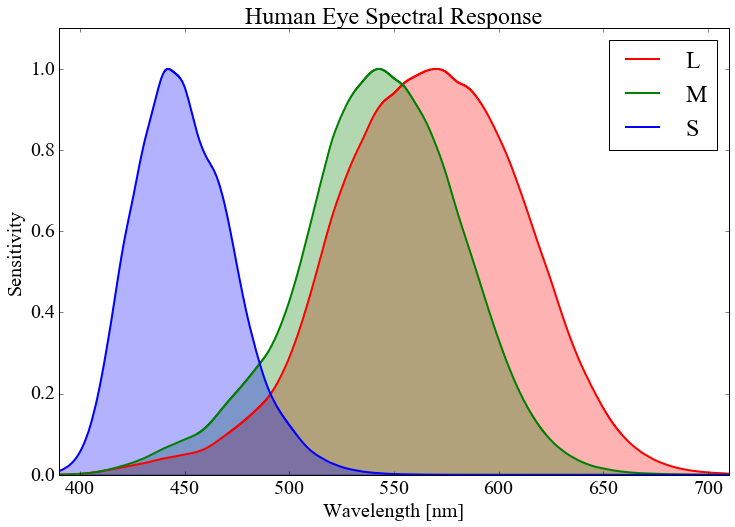

In [5]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])

ax.plot(wl1, L1, lw=2.0, c='R', label="L")
ax.fill_between(wl1,L1, color='R', alpha=0.3)
ax.plot(wl1, M1, lw=2.0, c='G', label="M")
ax.fill_between(wl1,M1, color='G', alpha=0.3)
ax.plot(wl1, S1, lw=2.0, c='B', label="S")
ax.fill_between(wl1,S1, color='B', alpha=0.3)

ax.set_ylim([0.0,1.1])
ax.set_xlim([390.,710.])
ax.legend(loc=1)
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Sensitivity")
ax.set_title("Human Eye Spectral Response")

## Load Test Spectra

### Mars:

In [6]:
data3 = np.genfromtxt("spectra/Mars_geo_albedo.txt")

In [7]:
mars_wl = data3[:,0] * 1000.0 # Convert microns to nm
mars_A = data3[:,1]

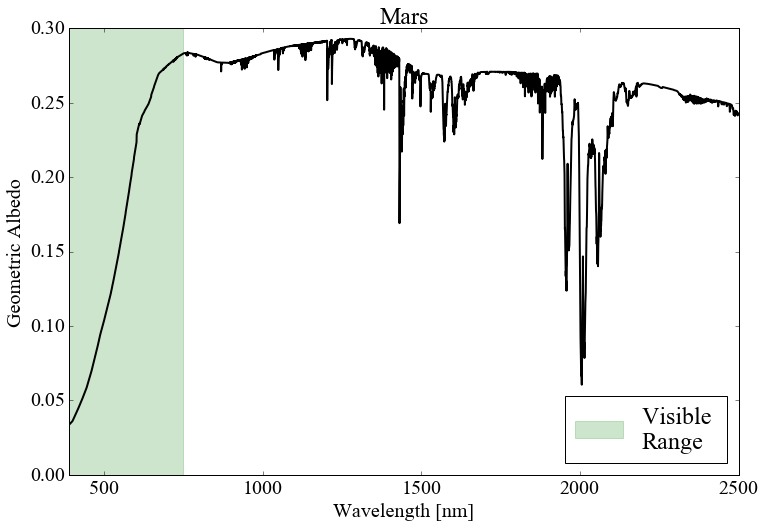

In [8]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.plot(mars_wl, mars_A, lw=2.0, c='k')
ax.set_xlim([390.,2500.])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Geometric Albedo")
ax.set_title("Mars")
ax.axvspan(300, 750, color="g", alpha=0.2, label="Visible \nRange")
ax.legend(loc=0)

### Earth:

In [9]:
data4 = np.genfromtxt("spectra/earth_quadrature_radiance_refl.dat", skip_header=8)

In [10]:
earth_wl = data4[:,0] * 1000.0 # Convert microns to nm
earth_I = data4[:,1]
earth_Sun = data4[:,2]
earth_R = data4[:,3]

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


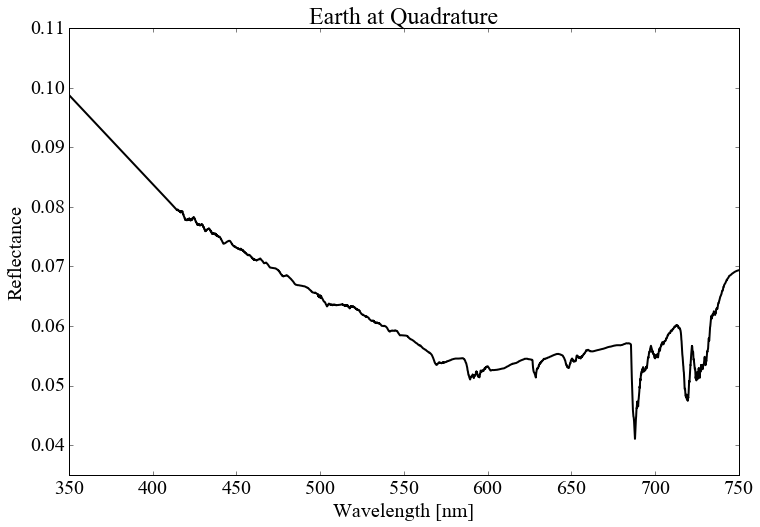

In [11]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.plot(earth_wl, earth_R, lw=2.0, c='k')
ax.set_xlim([350.,750.])
ax.set_ylim([0.035, 0.11])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Reflectance")
ax.set_title("Earth at Quadrature")
#ax.axvspan(300, 750, color="g", alpha=0.2, label="Visible \nRange")
ax.legend(loc=0)

In [251]:
np.sum(earth_R[(earth_wl > 380.0) & (earth_wl < 780)])

895.54991869999992

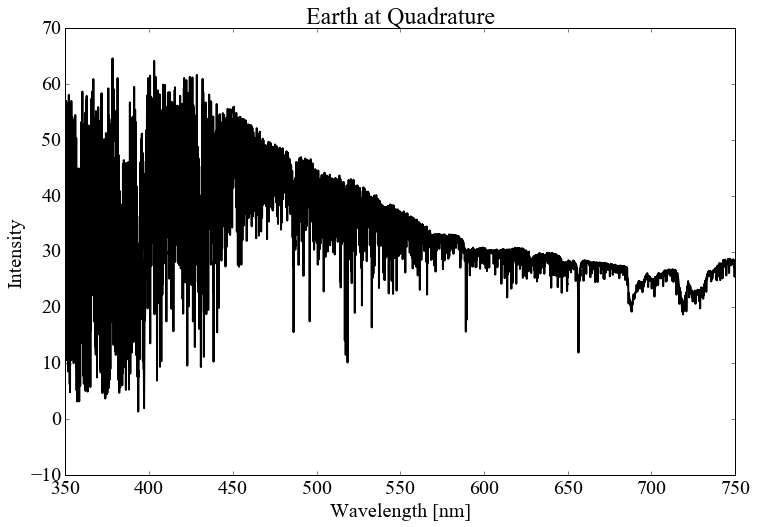

In [152]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.plot(earth_wl, earth_I, lw=2.0, c='k')
ax.set_xlim([350.,750.])
#ax.set_ylim([0.035, 0.11])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Intensity")
ax.set_title("Earth at Quadrature")
#ax.axvspan(300, 750, color="g", alpha=0.2, label="Visible \nRange")
ax.legend(loc=0)

## Color Matching Functions  

$$ X = \int_{380}^{780} M(\lambda) \bar{x} (\lambda) d \lambda $$

$$ Y = \int_{380}^{780} M(\lambda) \bar{y} (\lambda) d \lambda $$

$$ Z = \int_{380}^{780} M(\lambda) \bar{z} (\lambda) d \lambda $$

In [12]:
data5 = np.genfromtxt("eye_response_functions/ciexyz31_1.csv", delimiter=',')

In [13]:
wl_xyz = data5[:,0]
x = data5[:,1]
y = data5[:,2]
z = data5[:,3]

In [81]:
print np.sum(x)
print np.sum(y)
print np.sum(z)

106.86546949
106.856917101
106.892251279


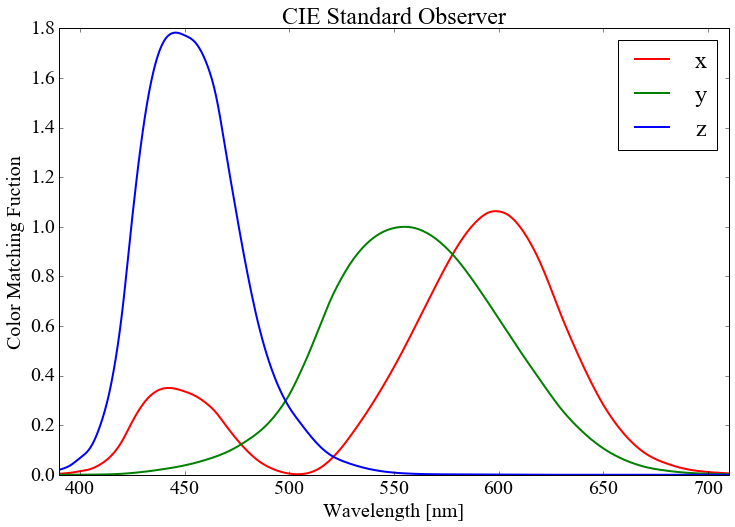

In [22]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])

ax.plot(wl_xyz, x, lw=2.0, c='R', label=r'x')
#ax.fill_between(wl_xyz,x, color='R', alpha=0.3)
ax.plot(wl_xyz, y, lw=2.0, c='G', label=r"y")
#ax.fill_between(wl_xyz,y, color='G', alpha=0.3)
ax.plot(wl_xyz, z, lw=2.0, c='B', label=r"z")
#ax.fill_between(wl_xyz,z, color='B', alpha=0.3)

#ax.set_ylim([0.0,1.1])
ax.set_xlim([390.,710.])
ax.legend(loc=1)
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Color Matching Fuction")
ax.set_title("CIE Standard Observer")

In [464]:
def plot_response(wl, x, y, z, ax=None, **kwargs):
    
    yscale = 1.0
    
    # Create new axis if not specified, otherwise add twinx to current figure
    if ax is None:
        fig = plt.figure(figsize=(12,8))
        gs = gridspec.GridSpec(1,1) 
        ax = plt.subplot(gs[0])
    else:
        ax = ax.twinx()
        ax.set_ylim([0.0,10.0])
        ax.axes.get_yaxis().set_visible(False)          
    
    # Plot response functions
    ax.fill_between(wl,x, color='R', label=r'x', alpha=0.3)
    ax.fill_between(wl,y, color='G', label=r'y', alpha=0.3)
    ax.fill_between(wl,z, color='B', label=r'z', alpha=0.3)
    
    # Add legend
    leg = ax.legend(loc=0)
    leg.get_frame().set_alpha(0.0)
    
    ax.set_ylabel("Response Function")

In [362]:
# Make copies of CMF
xx = np.copy(x)
yy = np.copy(y)
zz = np.copy(z)

In [39]:
# Set edges to 0 for extrapolation
xx[0] = 0; xx[-1] = 0
yy[0] = 0; yy[-1] = 0
zz[0] = 0; zz[-1] = 0

In [40]:
# Interpolate CMF to spectra wavelength grid:
x_interp = np.interp(earth_wl, wl_xyz, xx)
y_interp = np.interp(earth_wl, wl_xyz, yy)
z_interp = np.interp(earth_wl, wl_xyz, zz)

In [41]:
M = np.copy(earth_R)

In [45]:
# Integrate above equations
X = np.sum(M * x_interp)
Y = np.sum(M * y_interp)
Z = np.sum(M * z_interp)

In [67]:
# Define transformation matrix (T) from [X Y Z] -> [R G B] from Wright-Guild data
T = np.matrix([[0.41847, -0.091169, 0.00092090], [-0.15866, 0.25243, -0.0025498], [-0.082835, 0.015708, 0.17860]]).T

In [74]:
# Define [X Y Z] matrix
XYZ = np.matrix([X,Y,Z]).T

In [75]:
# Calculate [R, G, B]
RGB = T * XYZ

In [140]:
print RGB

[[ 21.70987085]
 [ 38.47118604]
 [ 67.88834772]]


In [93]:
def color_rectangle(**kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    rect = plt.Rectangle((0.0, 0.0), 1, 1, **kwargs)
    ax.add_patch(rect)
    plt.axis('off')

In [136]:
rgb = (RGB.T[0,0]/255., RGB.T[0,1]/255., RGB.T[0,2]/255.)

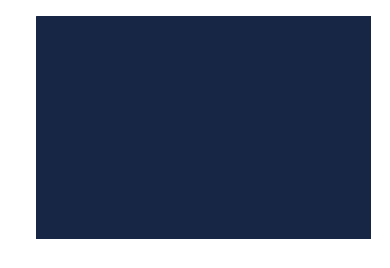

In [138]:
color_rectangle(color=rgb, alpha=1.0)

In [269]:
earth_wl[0]

100.179

In [641]:
def spectrum_to_rgb(wl, spectrum, color_line=False, stellar_spec=None):
    
    # Read-in CMF data
    data = np.genfromtxt("eye_response_functions/ciexyz31_1.csv", delimiter=',')
    wl_xyz = data5[:,0]
    x = data5[:,1]
    y = data5[:,2]
    z = data5[:,3]
    
    # Set edges to 0 for extrapolation
    x[0] = 0; x[-1] = 0
    y[0] = 0; y[-1] = 0
    z[0] = 0; z[-1] = 0
    
    # Only consider spectrum in visible wavelength range
    #wl = wl[(wl >= wl_xyz[0]-1.0) & (wl <= wl_xyz[-1]+1.0)]
    #M = spectrum[(wl >= wl_xyz[0]-1.0) & (wl <= wl_xyz[-1]+1.0)]
    #print wl
    #print wl_xyz
   
    # Interpolate CMF to spectra wavelength grid:
    #x = np.interp(wl, wl_xyz, x)
    #y = np.interp(wl, wl_xyz, y)
    #z = np.interp(wl, wl_xyz, z)
    
    # Interpolate spectra to CMF wavelength grid:
    spectrum = np.interp(wl_xyz, wl, spectrum)
    wl = wl_xyz
    
    # Normalize response curves
    #x = x / np.max(x)
    #y = y / np.max(y)
    #z = z / np.max(z)
    
    # Normalize spectrum
    wl_near = 560.0
    iwl_near = jakely.toolbox.find_nearest(spectrum, np.max(spectrum))
    M = spectrum  #/ spectrum[iwl_near]
    
    # Read-in solar spectrum
    if stellar_spec is None:
        pass
    elif stellar_spec == "Sun":             
        wl_solar = np.copy(earth_wl)
        F_solar = np.copy(earth_Sun)
        # Interpolate sun to CMF
        F_solar = np.interp(wl, wl_solar, F_solar)
        # Multiply Albedo and Flux
        M = M * F_solar
    else:
        print("Given stellar_spec is not included.")
    
    # Plot spectrum
    fig = plt.figure(figsize=(12,8))
    gs = gridspec.GridSpec(1,1) 
    ax1 = plt.subplot(gs[0])
    
    if color_line == True:
        wl_vis = np.linspace(350., 700., 10000)
        smap = jakely.colorize(wl_vis, cmap="Spectral_r")[1]
        M_vis = np.interp(wl_vis, wl, M)
        color = [smap.to_rgba(iwl) for iwl in wl]
        ax1.scatter(wl, M, lw=0.0, c=color, s=20)
    else:
        ax1.plot(wl, M, lw=2.0, c="k")
    
    ax1.set_xlim([350,700])
    ax1.set_xlabel(r"Wavelength [nm]")
    ax1.set_ylabel(r"Spectrum")
    
    # Plot filters
    plot_response(wl, x, y, z, ax=ax1)
    
    # Integrand
    Mx = M*x
    My = M*y
    Mz = M*z
    
    # Plot integrand
    #ax1.plot(wl, Mx, lw=2.0, c="r")
    #ax1.plot(wl, My, lw=2.0, c="g")
    #ax1.plot(wl, Mz, lw=2.0, c="b")
    
    # Integrate CMF equations to get tristimulus values for each color
    #dwl = wl[1] - wl[0]
    #X = np.sum(Mx)
    #Y = np.sum(My)
    #Z = np.sum(Mz)
    
    X = np.trapz(Mx, wl)
    Y = np.trapz(My, wl)
    Z = np.trapz(Mz, wl)
    
    
    # Plot XYZ
    #ax1.plot(wl, X, "o", lw=2.0, c="r")
    #ax1.plot(wl, Y, "o", lw=2.0, c="g")
    #ax1.plot(wl, Z, "o", lw=2.0, c="b")
    
    #print X,Y,Z
    
    # Define transformation matrix (T) from [X Y Z] -> [R G B] from Wright-Guild data
    T = np.matrix([[0.41847, -0.091169, 0.00092090],\
                   [-0.15866, 0.25243, -0.0025498],\
                   [-0.082835, 0.015708, 0.17860]]).T
    
    # Define [X Y Z] matrix
    XYZ = np.matrix([X,Y,Z]).T
    
    # Perform transformation to [R, G, B]
    RGB = T * XYZ
    
    # 
    R = RGB.T[0,0]
    G = RGB.T[0,1]
    B = RGB.T[0,2]
    
    # Create (R,G,B) tuple (good for plotting with mpl)
    cscale = np.max(RGB)
    rgb = (R/cscale, G/cscale, B/cscale)
    #rgb = (RGB.T[0,0], RGB.T[0,1], RGB.T[0,2])
    
    print rgb
    
    # Set plot background color to derived rgb color
    ax1.patch.set_facecolor(rgb)
    
    return rgb

(0.69554437158620164, 0.81194610135072254, 1.0)


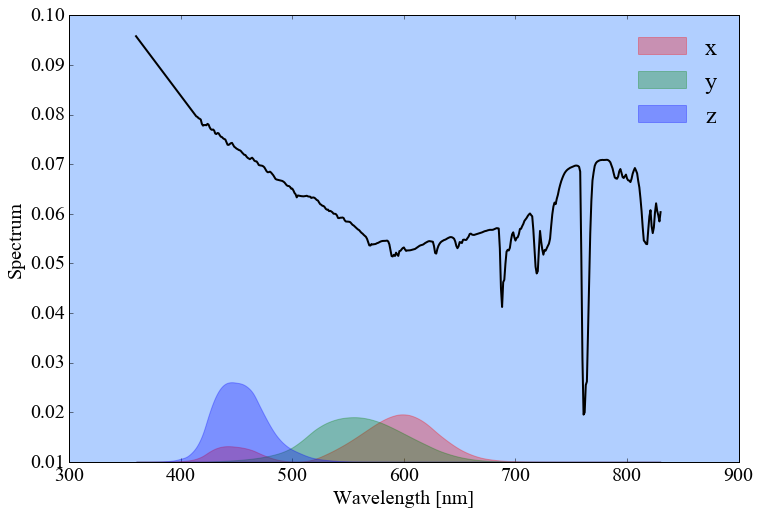

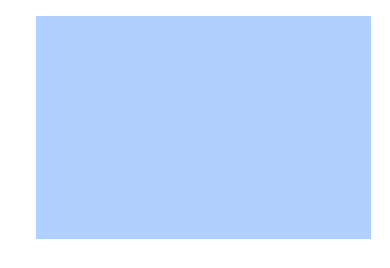

In [662]:
rgb = spectrum_to_rgb(earth_wl, earth_R, color_line=False, stellar_spec=None)
color_rectangle(color=rgb, alpha=1.0)

(1.0, 0.58890802129913433, 0.25818010148635767)


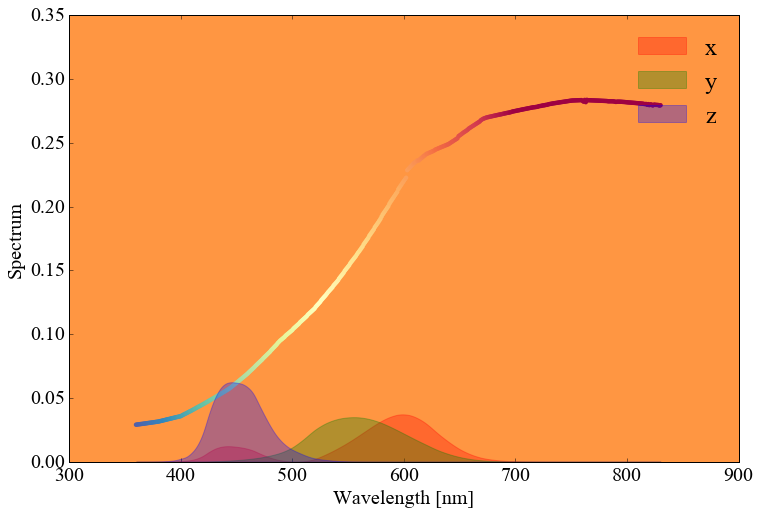

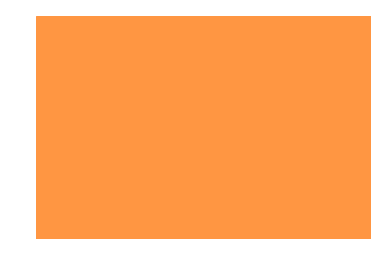

In [674]:
rgb = spectrum_to_rgb(mars_wl, mars_A, stellar_spec=None, color_line=True)
color_rectangle(color=rgb, alpha=1.0)

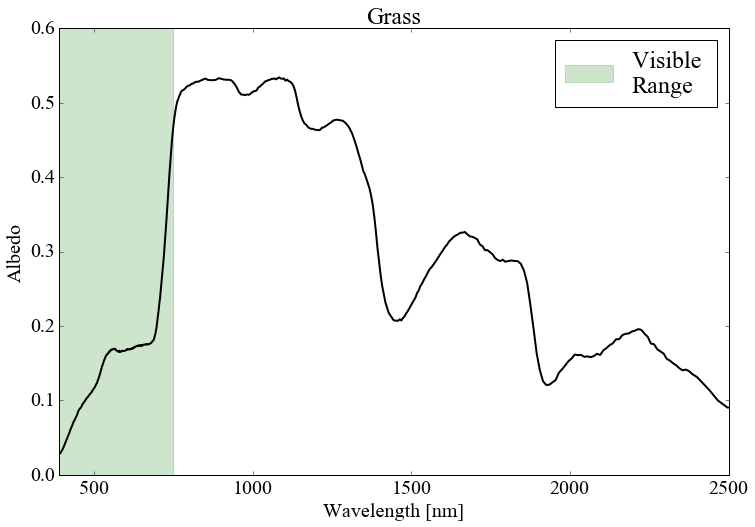

In [589]:
data = np.genfromtxt("spectra/grass.alb", skip_header=26)
grass_wl = data[:,0] * 1000.0
grass_A = data[:,1]

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.plot(grass_wl, grass_A, lw=2.0, c='k')
ax.set_xlim([390.,2500.])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Albedo")
ax.set_title("Grass")
ax.axvspan(300, 750, color="g", alpha=0.2, label="Visible \nRange")
ax.legend(loc=0)

(0.74531867559735576, 1.0, 0.58376654464833866)


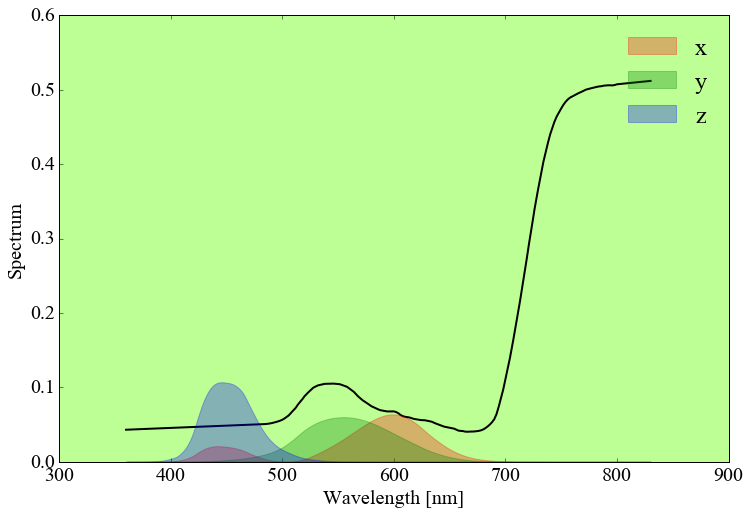

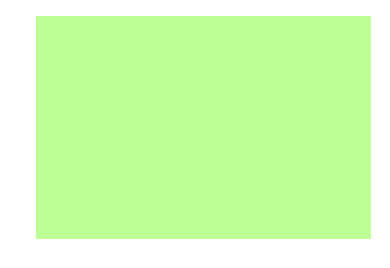

In [676]:
rgb = spectrum_to_rgb(grass_wl, grass_A, stellar_spec=None)
color_rectangle(color=rgb, alpha=1.0)

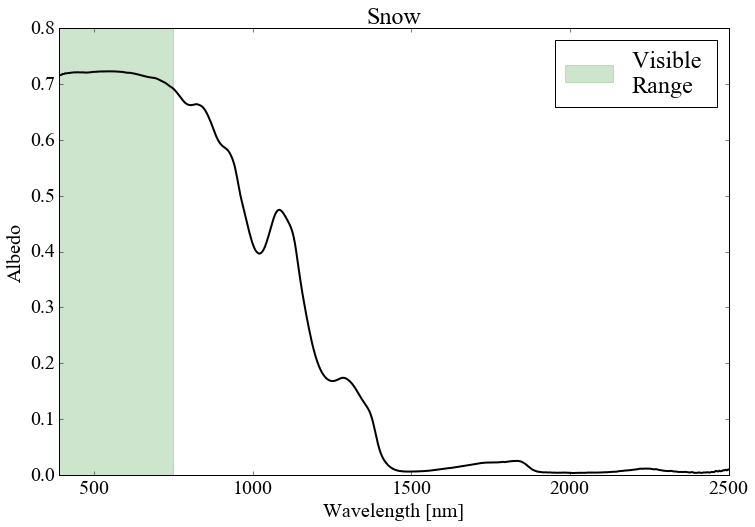

In [646]:
data = np.genfromtxt("spectra/snow.alb", skip_header=26)
snow_wl = data[:,0] * 1000.0
snow_A = data[:,1]

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.plot(snow_wl, snow_A, lw=2.0, c='k')
ax.set_xlim([390.,2500.])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Albedo")
ax.set_title("Snow")
ax.axvspan(300, 750, color="g", alpha=0.2, label="Visible \nRange")
ax.legend(loc=0)

(0.99612108789520226, 1.0, 0.99838342713749173)


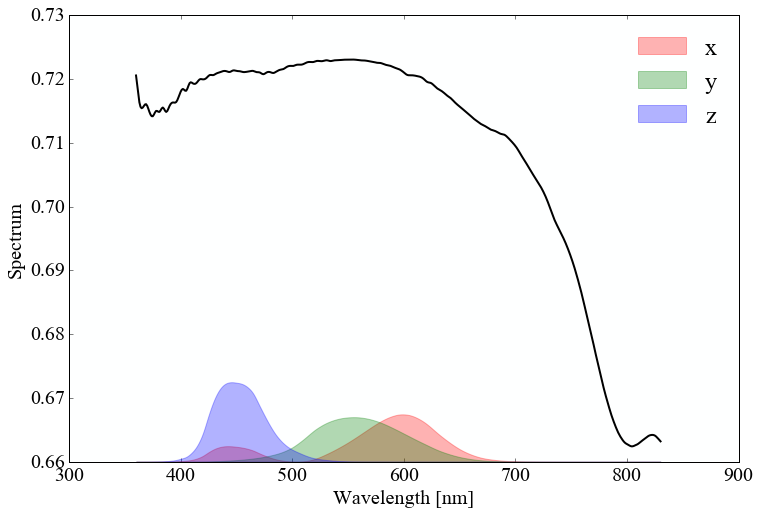

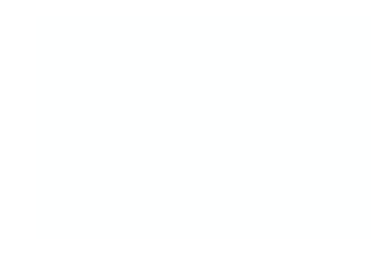

In [647]:
rgb = spectrum_to_rgb(snow_wl, snow_A)
color_rectangle(color=rgb, alpha=1.0)

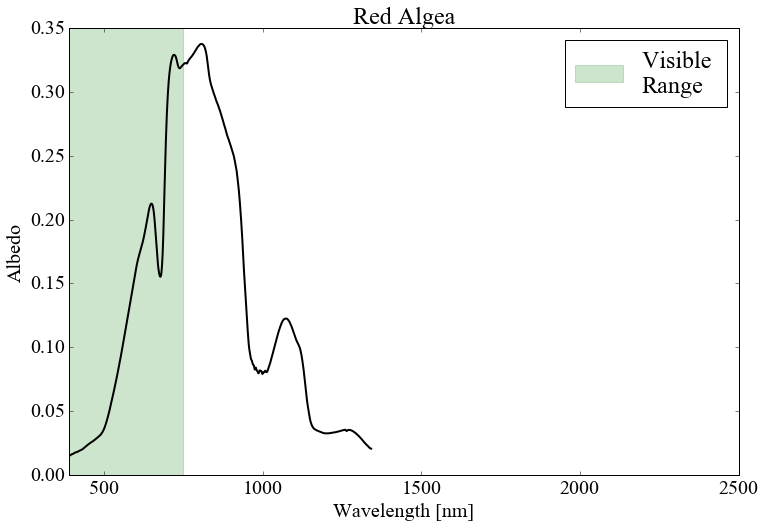

In [593]:
data = np.genfromtxt("spectra/red_algae.alb", skip_header=16)
redalg_wl = data[:,0] * 1000.0
redalg_A = data[:,1]

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.plot(redalg_wl, redalg_A, lw=2.0, c='k')
ax.set_xlim([390.,2500.])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Albedo")
ax.set_title("Red Algea")
ax.axvspan(300, 750, color="g", alpha=0.2, label="Visible \nRange")
ax.legend(loc=0)

(1.0, 0.47063705084218405, 0.13857188042562332)


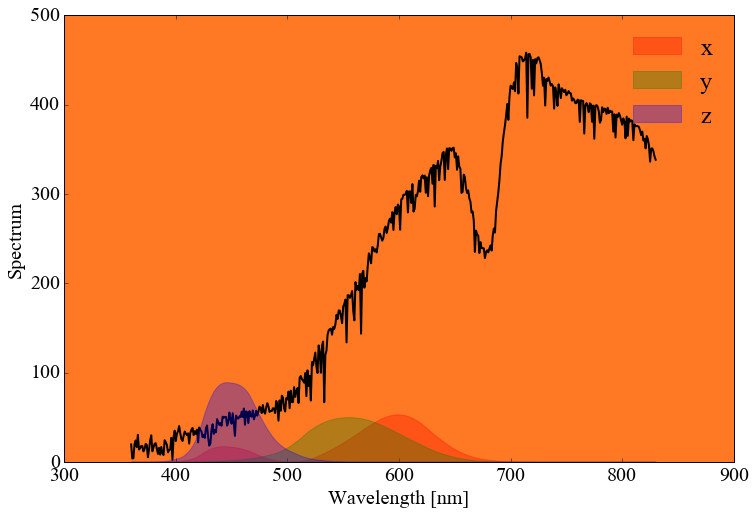

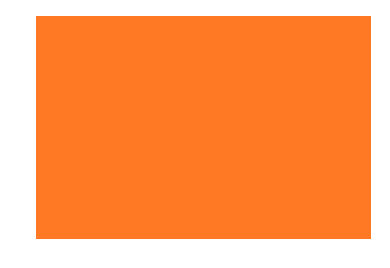

In [675]:
rgb = spectrum_to_rgb(redalg_wl, redalg_A, color_line=False, stellar_spec="Sun")
color_rectangle(color=rgb, alpha=1.0)

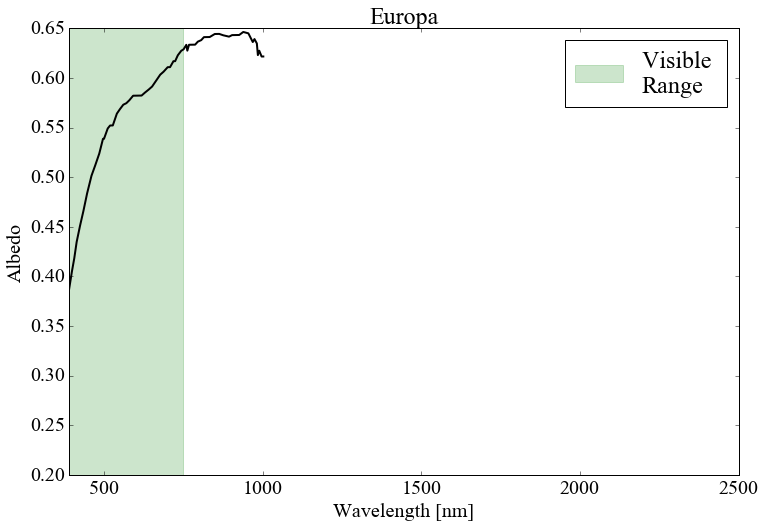

In [595]:
data = np.genfromtxt("spectra/europa.alb", skip_header=1)
europa_wl = data[:,0] * 1000.0
europa_A = data[:,1]

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.plot(europa_wl, europa_A, lw=2.0, c='k')
ax.set_xlim([390.,2500.])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Albedo")
ax.set_title("Europa")
ax.axvspan(300, 750, color="g", alpha=0.2, label="Visible \nRange")
ax.legend(loc=0)

(1.0, 0.94372571308313014, 0.82081951825653698)


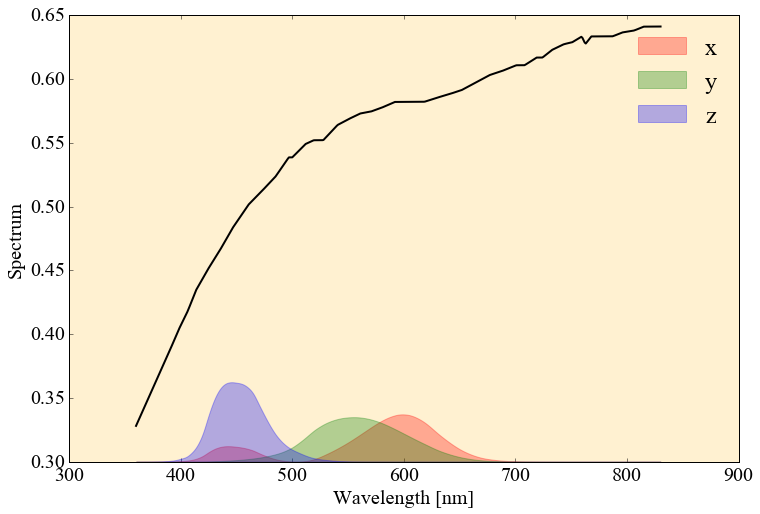

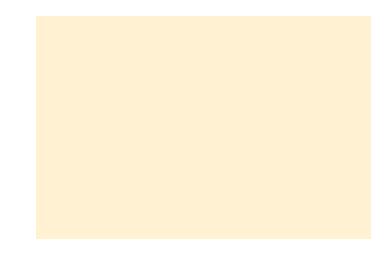

In [650]:
rgb = spectrum_to_rgb(europa_wl, europa_A)
color_rectangle(color=rgb, alpha=1.0)

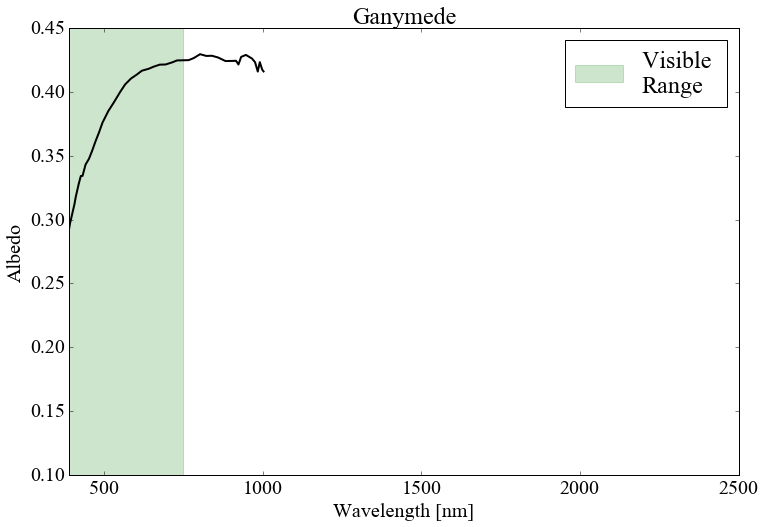

In [597]:
data = np.genfromtxt("spectra/ganymede.alb", skip_header=1)
ganymede_wl = data[:,0] * 1000.0
ganymede_A = data[:,1]

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.plot(ganymede_wl, ganymede_A, lw=2.0, c='k')
ax.set_xlim([390.,2500.])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Albedo")
ax.set_title("Ganymede")
ax.axvspan(300, 750, color="g", alpha=0.2, label="Visible \nRange")
ax.legend(loc=0)

(1.0, 0.93446849083984074, 0.82271943142504933)


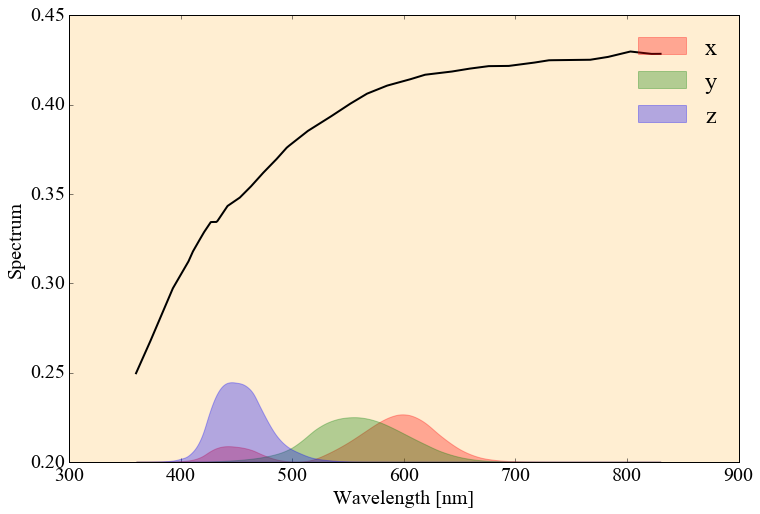

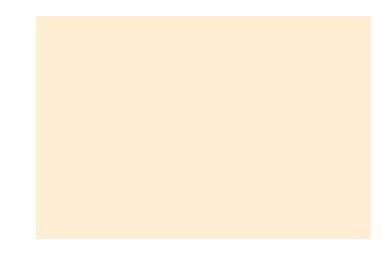

In [651]:
rgb = spectrum_to_rgb(ganymede_wl, ganymede_A)
color_rectangle(color=rgb, alpha=1.0)

(0.61265348487652305, 0.79131571023175062, 1.0)


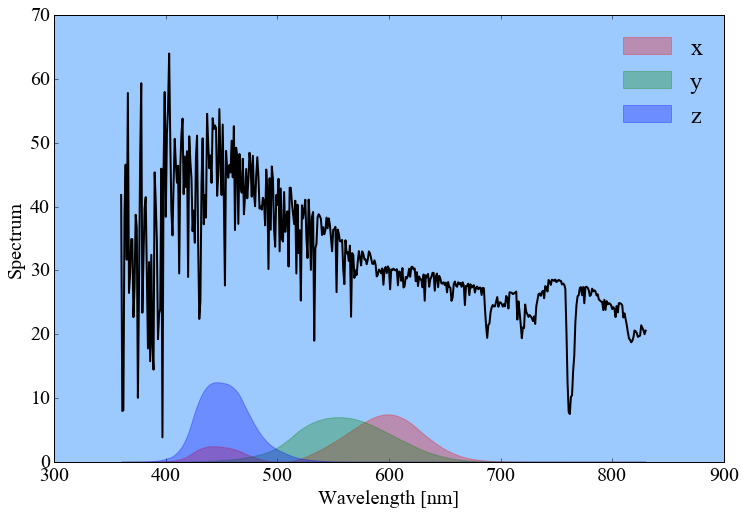

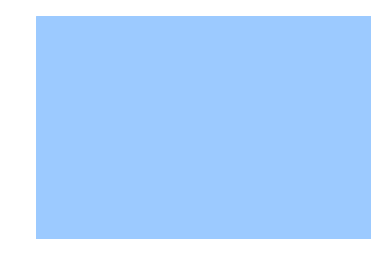

In [653]:
rgb = spectrum_to_rgb(earth_wl, earth_I, color_line=False)
color_rectangle(color=rgb, alpha=1.0)

(0.88633259099098571, 0.97017775979658138, 1.0)


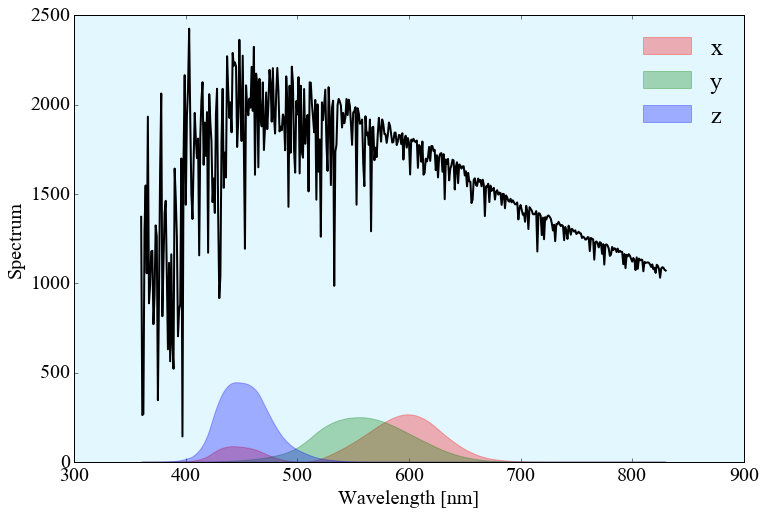

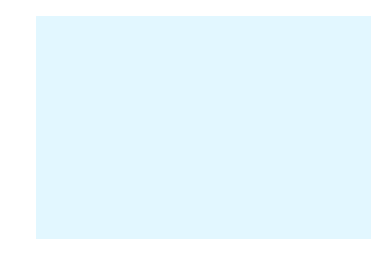

In [654]:
rgb = spectrum_to_rgb(earth_wl, earth_Sun, color_line=False)
color_rectangle(color=rgb, alpha=1.0)

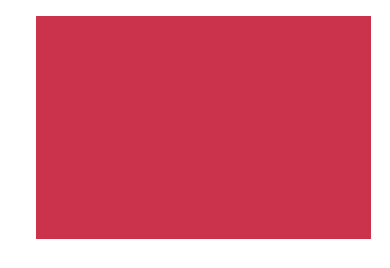

In [578]:
wl_vis = np.linspace(350., 700., 1000)
wlcol = 670.
cvis, smap, cnorm = jakely.colorize(wl_vis, cmap="Spectral_r")
color_rectangle(color=smap.to_rgba(wlcol), alpha=1.0)

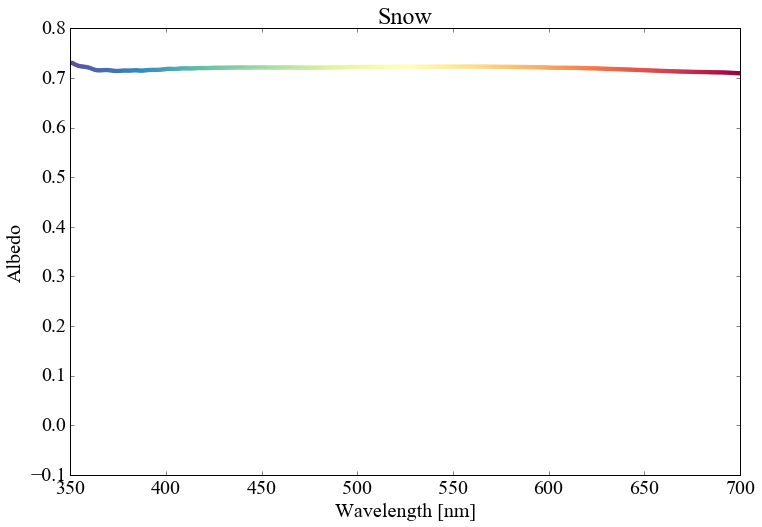

In [585]:
color = [smap.to_rgba(iwl) for iwl in snow_wl]
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax = plt.subplot(gs[0])
ax.scatter(snow_wl, snow_A, lw=0.0, c=color, s=20)
ax.set_xlim([350.,700.])
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Albedo")
ax.set_title("Snow")

(0.74531867559735576, 1.0, 0.58376654464833866)


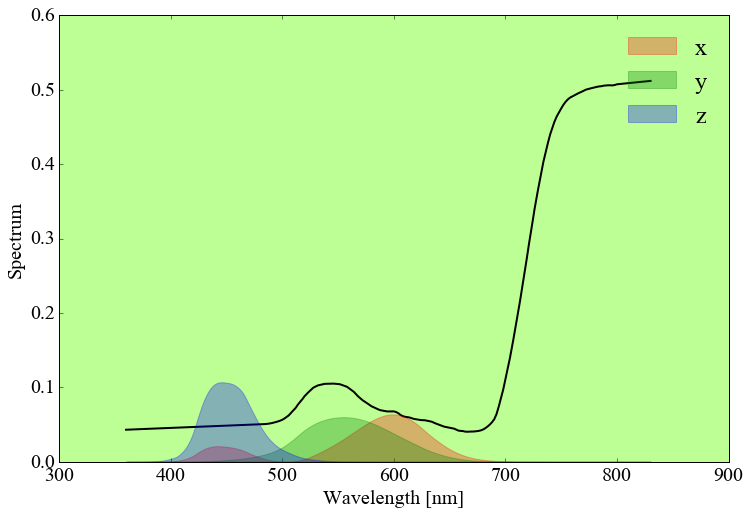

In [673]:
data = np.genfromtxt("spectra/conifers.alb", skip_header=26)
lam = data[:,0] * 1000.0
A = data[:,1]
rgb = spectrum_to_rgb(lam, A, color_line=False, stellar_spec=None)

(0.3783284568811966, 0.57024417076827338, 1.0)


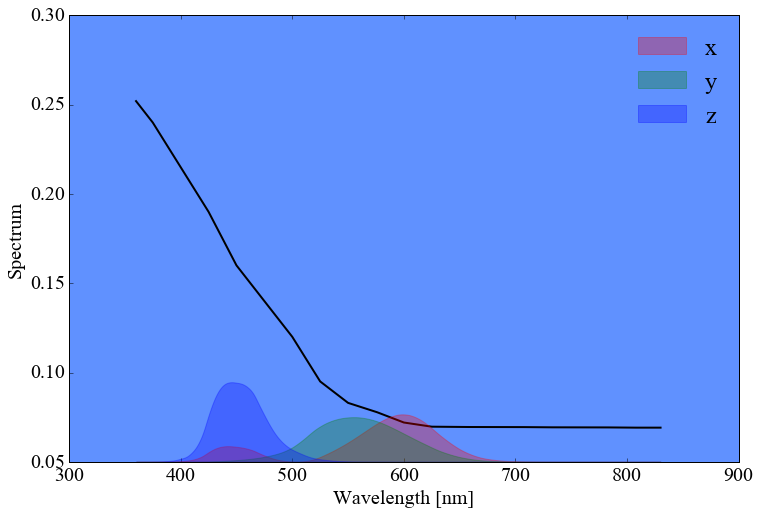

In [672]:
data = np.genfromtxt("spectra/ocean.alb", skip_header=26)
lam = data[:,0] * 1000.0
A = data[:,1]
rgb = spectrum_to_rgb(lam, A, color_line=False)